# (1 of 3) Baseline Models
---
# AMEX Default
# Dimensionality Reduction: PCA, LDA
### (Compared by Classification Algorithms)
---

### We'll predict if the customers will default the payment.
The target is calculated by observing 18 months window after the latest statement, if the customer doesn't pay due in 120 days after their latest statement date it's considered a default.    

We'll be using PCA and LDA to reduce the dimension of the dataset.

Then perform the classification by using Logistic Regression, Decision Tree, Naive Bayes, and Random Forest; in the latest notebook, we'll compare Baseline, PCA, and LDA.

---

In [1]:
import sys
sys.version

'3.8.8 (default, Apr 13 2021, 19:58:26) \n[GCC 7.3.0]'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import joblib

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
df = pd.read_parquet('./dataset/train_data.parquet')

### Every feature are anonymized and normalized.

In [4]:
df.shape

(5531451, 191)

In [5]:
df.sample(5)

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
3705281,ab335f9cca2caf7d1bfef7a2eae6fa12f0af31831e0e74...,2017-07-26,0.291102,0.178555,0.056986,0.080317,0.007764,0.483844,0.000939,0.243556,...,NaN,NaN,0.002004,0.004265,0.004686,NaN,0.008010,0.004604,0.006631,1
893681,296cda68cd0a317911a7ff829f908fc0e45d079c903f15...,2018-03-13,0.772613,0.004131,0.010371,0.818033,0.000907,0.190021,0.005010,0.009391,...,NaN,NaN,0.002154,0.002606,0.006470,NaN,0.008264,0.007594,0.000618,0
2806027,8180a72433c782efc5379f0d902dd76aa9e7ddaaa69634...,2017-03-19,0.681594,0.270646,0.122905,0.293392,0.001252,0.122650,0.001648,0.022808,...,NaN,NaN,0.000978,0.000155,0.000300,NaN,0.006295,0.007433,0.009785,0
2479274,72782c1d162ae7cdb32d4948373c065e485789179b6292...,2017-12-14,0.066480,0.000747,0.225318,0.115775,0.009571,0.189540,0.782814,0.326277,...,NaN,NaN,0.001569,0.005144,0.001206,NaN,0.008910,0.004705,0.006294,1
3034260,8c1daf193f19cb4245d67d1f4e7a4ee732c826e327fe82...,2017-08-22,0.341052,0.419288,0.658752,0.021095,0.001294,0.178685,0.008590,0.815337,...,NaN,NaN,0.003003,0.001345,0.000634,NaN,0.007731,0.009008,0.006097,1


In [6]:
df.describe()

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
count,5.485466e+06,5.531451e+06,5.531451e+06,5.529435e+06,5.531451e+06,4.510907e+06,5.529435e+06,5.529435e+06,791314.000000,3.873055e+06,...,1.946990e+05,1.946990e+05,5.429903e+06,5.490819e+06,5.429903e+06,944408.000000,5.429903e+06,5.490724e+06,5.429903e+06,5.531451e+06
mean,6.581885e-01,1.514543e-01,1.225995e-01,6.105151e-01,7.632776e-02,2.264676e-01,5.831698e-02,1.302262e-01,0.184966,1.544140e-01,...,1.424414e-02,1.646144e-01,1.750432e-01,2.634348e-02,1.615358e-01,0.390781,1.749181e-01,5.131478e-02,6.084983e-02,2.490972e-01
std,2.441398e-01,2.705955e-01,2.131456e-01,4.029192e-01,2.221323e-01,1.925726e-01,1.984337e-01,2.343981e-01,0.228140,2.129113e-01,...,9.569677e-02,2.670328e-01,3.696215e-01,1.442015e-01,3.456256e-01,0.236142,3.695211e-01,1.791743e-01,1.889250e-01,4.324903e-01
min,-4.589548e-01,5.026190e-09,-7.588799e+00,9.192280e-09,1.534223e-09,-6.271321e-01,5.566545e-10,6.285293e-09,-0.000454,1.154550e-07,...,1.078787e-08,3.307923e-08,3.767347e-10,3.725073e-09,1.650100e-10,-0.014539,5.549692e-09,2.500991e-09,1.226024e-09,0.000000e+00
25%,4.803307e-01,4.528464e-03,8.863645e-03,1.053313e-01,2.895934e-03,1.272588e-01,2.873244e-03,5.227570e-03,0.037516,4.227546e-02,...,2.532470e-03,3.517452e-03,3.027212e-03,2.555848e-03,3.026087e-03,0.199399,3.028116e-03,2.752895e-03,3.028347e-03,0.000000e+00
50%,6.942950e-01,9.056902e-03,3.132968e-02,8.143328e-01,5.782230e-03,1.639082e-01,5.746725e-03,9.777229e-03,0.120519,8.851244e-02,...,5.069830e-03,7.037814e-03,6.053010e-03,5.110523e-03,6.051590e-03,0.382136,6.053151e-03,5.508129e-03,6.053247e-03,0.000000e+00
75%,8.648159e-01,2.366407e-01,1.259019e-01,1.002403e+00,8.660590e-03,2.581017e-01,8.615665e-03,1.550507e-01,0.250869,1.843206e-01,...,7.573434e-03,5.015469e-01,9.080455e-03,7.663697e-03,9.078914e-03,0.559307,9.076287e-03,8.260448e-03,9.080930e-03,0.000000e+00
max,1.010000e+00,5.389619e+00,1.324060e+00,1.010000e+00,3.256284e+00,5.482888e+00,8.988807e+00,1.625262e+00,4.191119,1.011162e+01,...,1.009998e+00,3.005383e+00,1.010000e+00,1.010000e+00,1.339910e+00,2.229368,1.010000e+00,1.343331e+00,4.827630e+00,1.000000e+00


**There're 4 data types in this dataset.**  
1. customer_ID.
2. S_2 is a datetime.
3. 11 categorical features: B_30, B_38, D_114, D_116, D_117, D_120, D_126, D_63, D_64, D_66, D_68.
4. The rest 178 features are float and int.

#### Change to the appropriate data types.

In [7]:
df['S_2'] = pd.to_datetime(df['S_2'], format='%Y/%m/%d')

In [8]:
category_cols = ['B_30','B_38','D_114','D_116','D_117','D_120','D_126','D_63','D_64','D_66','D_68']

for col in category_cols:
    df[col] = df[col].astype('category')

In [12]:
#df.info(max_cols=200, show_counts=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5531451 entries, 0 to 5531450
Columns: 191 entries, customer_ID to target
dtypes: category(11), datetime64[ns](1), float32(176), int64(2), object(1)
memory usage: 3.9+ GB


#### Map the string values into numeric.

In [10]:
df['D_63'].unique()

['CR', 'CO', 'CL', 'XZ', 'XM', 'XL']
Categories (6, object): ['CR', 'CO', 'CL', 'XZ', 'XM', 'XL']

In [11]:
my_dictionary = {'CO':0,'CR':1,'CL':2,'XL':3,'XZ':4,'XM':5}
df['D_63'] = df['D_63'].map(my_dictionary)

In [12]:
df['D_64'].unique()

['O', 'R', NaN, 'U', '-1']
Categories (4, object): ['O', 'R', 'U', '-1']

In [13]:
my_dictionary = {'O':0,'R':1,'U':2,'-1':3}
df['D_64'] = df['D_64'].map(my_dictionary)

#### Find the target ratio

<AxesSubplot:xlabel='target', ylabel='count'>

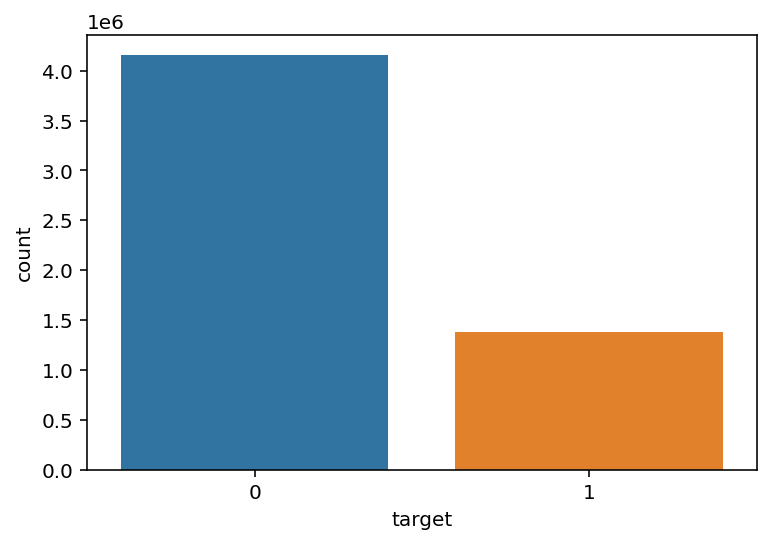

In [14]:
sns.countplot(x=df['target'])

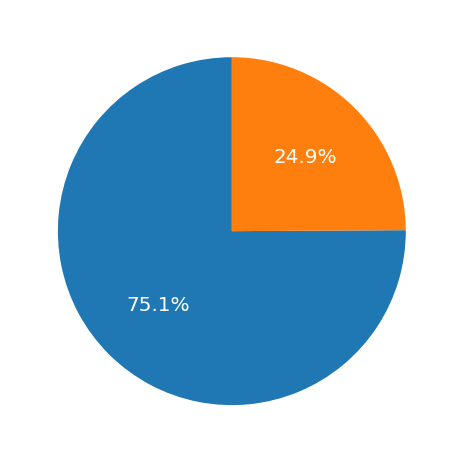

In [15]:
plt.pie(df['target'].value_counts(),
        autopct='%1.1f%%', startangle=90,
        textprops=dict(color='w', size=10))
plt.show()

This is an imbalanced dataset because default customers are so fewer.


## Missing Values

In [16]:
percent_missing = df.isnull().sum() * 100 / len(df)
df_missing_val = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

df_missing_val.sort_values('percent_missing',ascending=False)

,column_name,percent_missing
D_87,D_87,99.930127
D_88,D_88,99.891457
D_108,D_108,99.476846
D_110,D_110,99.433530
D_111,D_111,99.433530
...,...,...
B_24,B_24,0.000000
D_75,D_75,0.000000
P_4,P_4,0.000000
B_23,B_23,0.000000


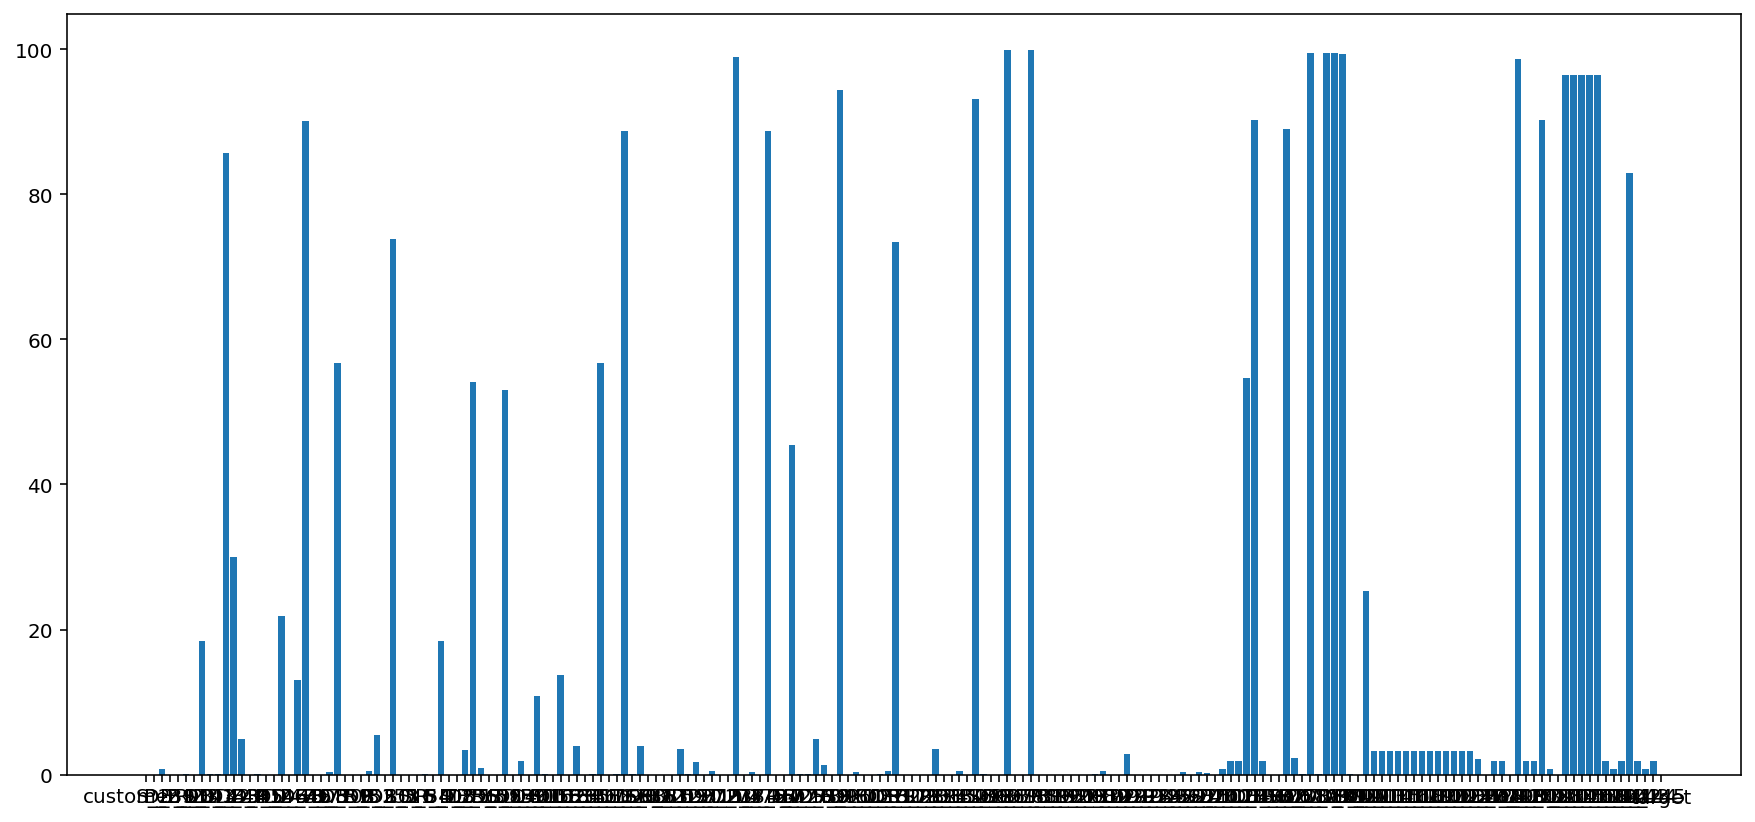

In [17]:
plt.figure(figsize=(15,7))
plt.bar(x='column_name',height='percent_missing',data=df_missing_val)
plt.show()

In [18]:
df_missing_val.loc[df_missing_val.percent_missing > 50].shape

(30, 2)

We'll drop columns that have nulls more than 50% of that column.

In [19]:
df.drop(
    columns=df_missing_val.loc[
        df_missing_val.percent_missing > 50
    ].index, inplace=True, errors='ignore'
)

Then drop the rest rows that still have nulls.

In [20]:
df.dropna(inplace=True)

In [21]:
df.shape

(1301619, 161)

From the dataset size (5531451, 191) was reduced to size (1301619, 161).  
We still have enough data for training.

Find the target ratio after we get rid of missing values.

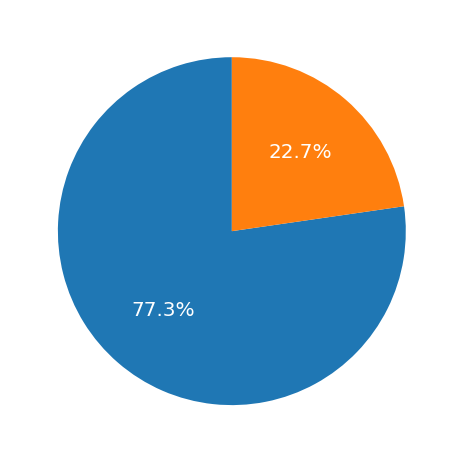

In [22]:
plt.pie(df['target'].value_counts(),
        autopct='%1.1f%%', startangle=90,
        textprops=dict(color='w', size=10))
plt.show()

### Train/test split with the 80:20 ratio

In [23]:
X = df.drop(['target','customer_ID','S_2'],axis=1)
y = df['target']

In [24]:
print(X.shape)
print(y.shape)

(1301619, 158)
(1301619,)


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

In [27]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1041295, 158)
(260324, 158)
(1041295,)
(260324,)


---
#### This evaluation function will keep the evaluation values to use in the Performance Graph Comparison later.

In [28]:
acc = {}; f1 = {}; prec = {}; recl = {}

def my_eval(model,y_test,predicted):
    
    print(model,'Results')
    print('Accuracy: ', accuracy_score(y_test, predicted))
    print('F1 Score: ', f1_score(y_test, predicted))
    print('Precision: ', precision_score(y_test, predicted))
    print('Recall: ', recall_score(y_test, predicted))
    
    acc[model] = accuracy_score(y_test, predicted)
    f1[model] = f1_score(y_test, predicted)
    prec[model] = precision_score(y_test, predicted)
    recl[model] = recall_score(y_test, predicted)
    
    global df_model_compare
    df_model_compare = pd.DataFrame.from_dict(
        [acc,f1,prec,recl]
    ).rename(
        index={0:'Accuracy',1:'F1 Score',2:'Precision',3:'Recall'}
    )
    display(df_model_compare)

---

# Baseline Models

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

### Logistic Regression (Baseline)

In [ ]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(max_iter=1000)
logit.fit(X_train, y_train)

In [30]:
# Save Model
#joblib.dump(logit, './models/Logit_Baseline.pkl')

# Load Model
logit = joblib.load('./models/Logit_Baseline.pkl')

Running time is about 5 minutes.

In [31]:
logistic_predicted = logit.predict(X_test)

In [32]:
confusion_matrix(y_test, logistic_predicted)

array([[188742,  12592],
       [ 16004,  42986]])

[ TN FP ]  
[ FN TP ]

TP (Predict as default; the truth is default)  
TN (Predict as not default; the truth is not default)  
FP (Predict as default; the truth is not default)  
FN (Predict as not default; the truth is default)

In [33]:
my_eval('Logit',y_test,logistic_predicted)

Logit Results
Accuracy:  0.8901522717843917
F1 Score:  0.7504015082745618
Precision:  0.7734355320450538
Recall:  0.7286997796236651


,Logit
Accuracy,0.890152
F1 Score,0.750402
Precision,0.773436
Recall,0.728700


### Naive Bayes (Baseline)

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

Running time is about 5 seconds.

In [34]:
# Save Model
#joblib.dump(nb, './models/NB_Baseline.pkl')

# Load Model
nb = joblib.load('./models/NB_Baseline.pkl')

In [35]:
nb_predicted = nb.predict(X_test)

In [36]:
confusion_matrix(y_test, nb_predicted)

array([[180147,  21187],
       [ 15157,  43833]])

[ TN FP ]  
[ FN TP ]

TP (Predict as default; the truth is default)  
TN (Predict as not default; the truth is not default)  
FP (Predict as default; the truth is not default)  
FN (Predict as not default; the truth is default)

In [37]:
my_eval('NB',y_test,nb_predicted)

NB Results
Accuracy:  0.8603893609502005
F1 Score:  0.7069268607370375
Precision:  0.6741464164872347
Recall:  0.7430581454483811


,Logit,NB
Accuracy,0.890152,0.860389
F1 Score,0.750402,0.706927
Precision,0.773436,0.674146
Recall,0.728700,0.743058


### Decision Tree (Baseline)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

Running time is about 20 minutes.

In [38]:
# Save Model
#joblib.dump(dtree, './models/DT_Baseline.pkl')

# Load Model
dtree = joblib.load('./models/DT_Baseline.pkl')

In [39]:
dtree_predicted = dtree.predict(X_test)

In [40]:
confusion_matrix(y_test, dtree_predicted)

array([[183366,  17968],
       [ 17948,  41042]])

[ TN FP ]  
[ FN TP ]

TP (Predict as default; the truth is default)  
TN (Predict as not default; the truth is not default)  
FP (Predict as default; the truth is not default)  
FN (Predict as not default; the truth is default)

In [41]:
my_eval('DT',y_test,dtree_predicted)

DT Results
Accuracy:  0.8620334659885374
F1 Score:  0.6956271186440678
Precision:  0.6955092357227588
Recall:  0.6957450415324631


,Logit,NB,DT
Accuracy,0.890152,0.860389,0.862033
F1 Score,0.750402,0.706927,0.695627
Precision,0.773436,0.674146,0.695509
Recall,0.728700,0.743058,0.695745


### Random Forest (Baseline)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

Running time is about 1 hour.

In [42]:
# Save Model
#joblib.dump(rf, './models/RF_Baseline.pkl')

# Load Model
rf = joblib.load('./models/RF_Baseline.pkl')

In [43]:
rf_predicted = rf.predict(X_test)

In [44]:
confusion_matrix(y_test, rf_predicted)

array([[190083,  11251],
       [ 12607,  46383]])

[ TN FP ]  
[ FN TP ]

TP (Predict as default; the truth is default)  
TN (Predict as not default; the truth is not default)  
FP (Predict as default; the truth is not default)  
FN (Predict as not default; the truth is default)

In [45]:
my_eval('RF',y_test,rf_predicted)

RF Results
Accuracy:  0.9083526682134571
F1 Score:  0.7954280422554535
Precision:  0.8047853697470243
Recall:  0.786285811154433


,Logit,NB,DT,RF
Accuracy,0.890152,0.860389,0.862033,0.908353
F1 Score,0.750402,0.706927,0.695627,0.795428
Precision,0.773436,0.674146,0.695509,0.804785
Recall,0.728700,0.743058,0.695745,0.786286


---

In [46]:
df_model_compare.to_csv('./eval_results/eval_results.csv')

---
# Kindly continue on the next notebook: (2 of 3) PCA